0.317905157085 dimensionless
Fuel consumption: 1019 lbs
    Failure rate:  78% 
0.308014405227 dimensionless
Fuel consumption: 1119 lbs
    Failure rate:  56% 
0.297869880671 dimensionless
Fuel consumption: 1233 lbs
    Failure rate:  28% 
0.287430019774 dimensionless
Fuel consumption: 1363 lbs
    Failure rate:  15% 
0.276643998749 dimensionless
Fuel consumption: 1513 lbs
    Failure rate:  4% 


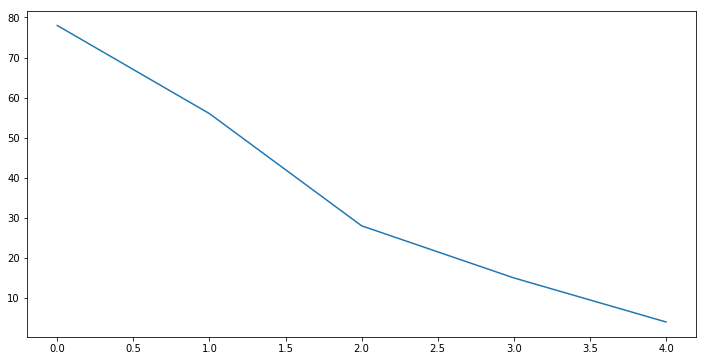

In [8]:
#### %pylab inline

import numpy as np
import scipy.stats as stats

from simpleac import SimPleAC
from monte_carlo import monte_carlo_results
from robust.robust import RobustModel


f = figure(figsize=(12, 6))
perfs = []
failures  = []

for gamma in np.linspace(0, 0.5, 5):    
    wing_weight_pr = 10.
    tsfc_pr = 10.
    v_min_pr = 20.
    range_pr = 10.

    # EXPERIMENT PARTICIPANTS: DON'T MODIFY BELOW THIS!!! #

    np.random.seed(seed=246)
#         print stats.norm.rvs()
    m = SimPleAC(wing_weight_pr, tsfc_pr, v_min_pr, range_pr)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    nominal_sol = m.localsolve(verbosity=0)

    np.random.seed(seed=246)
#         print stats.norm.rvs()
    rm = RobustModel(m, "elliptical", gamma=gamma, twoTerm=False,
                     boyd=False, simpleModel=False,
                     nominalsolve=nominal_sol)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    rm_sol = rm.robustsolve(verbosity=0,
                            minNumOfLinearSections=3,
                            maxNumOfLinearSections=99,
                            linearizationTolerance=1e-4)
    print rm_sol("C_L")
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    perf, failure = monte_carlo_results(m, sol=rm_sol)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    perfs.append(perf)
    failures.append(failure)
plot(failures)

In [ ]:
#### %pylab inline

import numpy as np
import scipy.stats as stats

from simpleac import SimPleAC
from monte_carlo import monte_carlo_results
from robust.robust import RobustModel


f = figure(figsize=(12, 6))
perfs = []
failures  = []

for _ in range(11):    
    gamma = 0.3
    wing_weight_pr = 10.
    tsfc_pr = 10.
    v_min_pr = 20.
    range_pr = 10.

    # EXPERIMENT PARTICIPANTS: DON'T MODIFY BELOW THIS!!! #

    np.random.seed(seed=246)
#         print stats.norm.rvs()
    m = SimPleAC(wing_weight_pr, tsfc_pr, v_min_pr, range_pr)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    nominal_sol = m.localsolve(verbosity=0)

    np.random.seed(seed=246)
#         print stats.norm.rvs()
    rm = RobustModel(m, "elliptical", gamma=gamma, twoTerm=False,
                     boyd=False, simpleModel=False,
                     nominalsolve=nominal_sol)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    rm_sol = rm.robustsolve(verbosity=0,
                            minNumOfLinearSections=3,
                            maxNumOfLinearSections=99,
                            linearizationTolerance=1e-4)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    perf, failure = monte_carlo_results(m, sol=rm_sol)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    perfs.append(perf)
    failures.append(failure)
plot(failures)

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


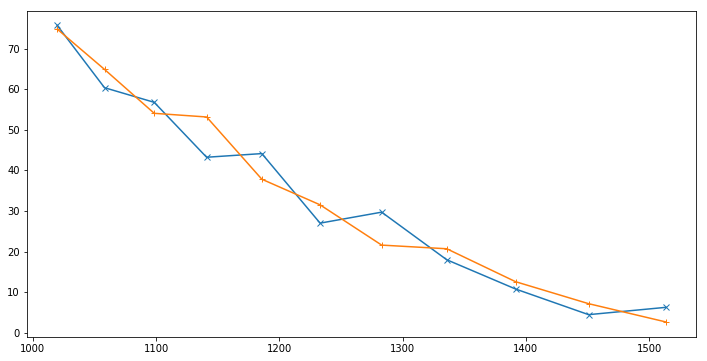

In [32]:
p2 = perfs
f2 = failures
f = figure(figsize=(12, 6))
plot(p1, f1, "-x")
plot(p2, f2, "-+")

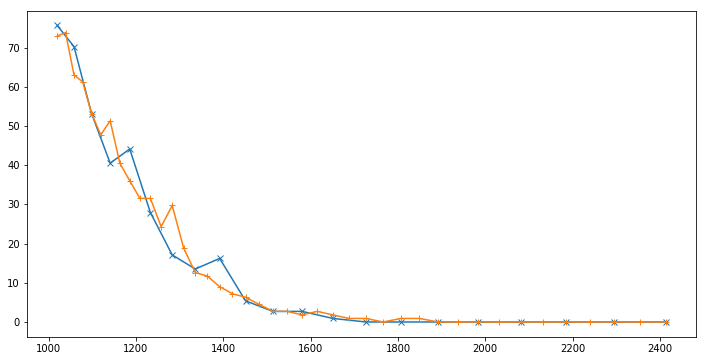

In [28]:
# perfs1 = perfs
# fails1 = failures
f = figure(figsize=(12, 6))
plot(perfs1, fails1, "-x")
plot(perfs2, fails2, "-+")